   # <font color = 'brown'> **WEB AND SOCIAL MEDIA ANALYTICS** </font>

### **MOUNTING GDRIVE WITH COLAB**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **CHECKING FOR FILES IN DRIVE**

In [ ]:
!ls drive/'MyDrive'/

'Capstone_web&social.ipynb'
 Cell_Phones_and_Accessories_5.csv
 meta_Cell_Phones_and_Accessories.json
 meta_Cell_Phones_and_Accessories.json.gz
 meta.csv
'Web and social media analytics'


### **IMPORTING LIBRARIES**

In [2]:
import pandas as pd
import numpy as np

### The following data sets are available
1.   meta data of type .json
2.   phone data of type .csv

The meta data holds information from sellers point of view and the phone data holds user information. 
We begin by unzipping the meta data file and extracting its content to a list



## **READING THE DATA**



In [3]:
# Reading the meta data
# importing libraries

import gzip
import shutil

#Path to the meta data zip file 'meta_cell_phones_and_Accessories' is the folder name under 'My Drive'
path1 = '/content/drive/MyDrive/meta_Cell_Phones_and_Accessories.json.gz'

# Path to meta data .json file
path2 = '/content/drive/MyDrive/meta_Cell_Phones_and_Accessories.json'

# Unzipping the meta data file
with gzip.open(path1, 'rb') as f_in:
    with open(path2, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [4]:
# Reading the unzipped meta data into a Python list. The result will be a list of dictionaries. 
import json

# Empty list to store the dictonaries
phonemetadata = []

# Reading the dictionaries in the json file and appending it to the list phonemetadata[]
with open(path2, 'r') as f:
    for line in f:
        phonemetadata.append(json.loads(line))

In [5]:
# Getting the number of entries in the phonemetadata list
len(phonemetadata)

590071

In [6]:
#converting the list phonemetadata into a data frame
df_meta=pd.DataFrame(phonemetadata)

#creating new .csv file for meta
df_meta.to_csv('/content/drive/MyDrive/meta.csv')

In [7]:
#reading meta.csv file
df_meta=pd.read_csv('/content/drive/MyDrive/meta.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
#Reading the .csv file of the phone data into a dataframe

df_phonedata = pd.read_csv('/content/drive/MyDrive/Cell_Phones_and_Accessories_5.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
df_phonedata.head(5)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,NEGATIVE
3,2.0,True,A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN,POSITIVE
4,4.0,True,A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN,POSITIVE


## **DATA PRE-PROCESSING** 



**Converting unix review time to date-time format for better observation**

In [10]:
#Transforming unixReview time to date time format in phone data
from datetime import datetime, timedelta
df_phonedata['Date&Time'] = df_phonedata['unixReviewTime'].apply(lambda d: (datetime.fromtimestamp(d) - timedelta(hours=2)).strftime('%Y-%m-%d'))


In [11]:
df_phonedata.head(2)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment,Date&Time
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE,2014-08-03
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE,2014-02-11


In [12]:
df_phonedata.info() #checking for dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128437 entries, 0 to 1128436
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   overall           1128437 non-null  float64
 1   verified          1128437 non-null  bool   
 2   reviewerID        1128437 non-null  object 
 3   asin              1128437 non-null  object 
 4   style             605241 non-null   object 
 5   reviewerName      1128281 non-null  object 
 6   reviewText        1127669 non-null  object 
 7   summary           1127912 non-null  object 
 8   unixReviewTime    1128437 non-null  int64  
 9   vote              92034 non-null    object 
 10  image             27107 non-null    object 
 11  review_sentiment  1128437 non-null  object 
 12  Date&Time         1128437 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 104.4+ MB


In [13]:
df_phonedata.isnull().sum() #checking for null values

overall                   0
verified                  0
reviewerID                0
asin                      0
style                523196
reviewerName            156
reviewText              768
summary                 525
unixReviewTime            0
vote                1036403
image               1101330
review_sentiment          0
Date&Time                 0
dtype: int64

In [14]:
df_phonedata=df_phonedata[~df_phonedata['style'].isnull()]

In [15]:
df_phonedata.isnull().sum()

overall                  0
verified                 0
reviewerID               0
asin                     0
style                    0
reviewerName            80
reviewText             435
summary                322
unixReviewTime           0
vote                557363
image               589137
review_sentiment         0
Date&Time                0
dtype: int64

In [16]:
df_phonedata.drop(['vote','image','unixReviewTime'], axis = 1, inplace = True) #dropping the columns with more null values

In [17]:
df_phonedata.head(3)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,review_sentiment,Date&Time
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,POSITIVE,2014-08-03
226,5.0,True,A1TNHWAM2GJ08G,961301375X,{'Color:': ' White'},P. Latella,this charger is amazing. Fantastic long cord a...,Perfect works great,POSITIVE,2014-02-10
227,5.0,True,AXGPQOWI0CF39,961301375X,{'Color:': ' White'},TimB.,I am very satisfied with this product! It came...,Very Nice Looking Item!,POSITIVE,2014-01-31


In [18]:
df_phonedata.shape

(605241, 10)

In [19]:
df_phonedata.describe()

,overall
count,605241.000000
mean,4.257537
std,1.198782
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [20]:
df_meta.head(3)

,Unnamed: 0,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,0,"['Cell Phones & Accessories', 'Accessories', '...",NaN,[],NaN,Trollies Sing a Long Party VHS,[],[],NaN,NaN,[],"557,379 in Movies & TV (",[],{'ASIN: ': '6303195164'},Movies & TV,NaN,NaN,NaN,6303195164
1,1,"['Cell Phones & Accessories', 'Accessories', '...",NaN,[],NaN,La Pura VHS,[],[],NaN,Maribel Guardia,[],"1,024,449 in Movies & TV (",[],{'ASIN: ': '630524412X'},Movies & TV,NaN,NaN,NaN,630524412X
2,2,"['Cell Phones & Accessories', 'Cases, Holsters...",NaN,"['New items to give you a new good mood, welco...",NaN,Leopard Thanksgiving Easter PC Black Case for ...,[],[],NaN,NaN,[],"5,315,017 in Books (",[],"{'Publisher:': 'juduiou', 'ASIN:': '6310200240...",Books,NaN,NaN,NaN,6310200240


In [21]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590071 entries, 0 to 590070
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    590071 non-null  int64 
 1   category      590071 non-null  object
 2   tech1         6585 non-null    object
 3   description   590071 non-null  object
 4   fit           43 non-null      object
 5   title         590062 non-null  object
 6   also_buy      590071 non-null  object
 7   image         590071 non-null  object
 8   tech2         231 non-null     object
 9   brand         577311 non-null  object
 10  feature       590071 non-null  object
 11  rank          590071 non-null  object
 12  also_view     590071 non-null  object
 13  details       590071 non-null  object
 14  main_cat      586685 non-null  object
 15  similar_item  50931 non-null   object
 16  date          45880 non-null   object
 17  price         127564 non-null  object
 18  asin          590071 non

In [22]:
df_meta.shape

(590071, 19)

In [23]:
df_meta.describe()

,Unnamed: 0
count,590071.000000
mean,295035.000000
std,170338.969683
min,0.000000
25%,147517.500000
50%,295035.000000
75%,442552.500000
max,590070.000000


In [24]:
df_meta.price.value_counts()

$7.99              6293
$9.99              6204
$6.99              5131
$8.99              4384
$14.99             3728
                   ... 
$22.46                1
$22.02 - $43.20       1
$191.69               1
$87.19                1
$238.95               1
Name: price, Length: 4668, dtype: int64

In [25]:
df_meta.similar_item.value_counts()

 class="a-bordered a-horizontal-stripes  a-spacing-extra-large a-size-base comparison_table">\n\n\n\n            \n            \n            \n            \n            \n            <tr class="comparison_table_image_row">\n                <td class="comparison_table_first_col"></td>\n\n\n                <th class="comparison_image_title_cell" role="columnheader">\n                    <div class="a-row a-spacing-top-micro">\n                        <center>\n                             <img alt="Galaxy S6 Case, EpicGadget(TM) Bling 3D Handmade Luxury I Love You Heart Chain Diamond Case Cover for Samsung Galaxy S6 + HD Clear Galaxy S6 VI Screen Protector (US Seller!!)" src="https://images-na.ssl-images-amazon.com/images/I/510KzkpjwBL._SL500_AC_SS350_.jpg" id="comparison_image">\n                        </center>\n                    </div>\n                    <div class="a-row a-spacing-top-small">\n                        <div id="comparison_title" class="a-section a-spacing-none">\n

In [26]:
#dropping duplicates in ASIN

df_meta.drop_duplicates(subset='asin',inplace=True)

In [27]:
mask=df_meta["category"].apply(lambda x:x[31:35]=="Cell")

In [28]:
df_meta=df_meta[mask]
df_meta.head(2)

,Unnamed: 0,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
36,36,"['Cell Phones & Accessories', 'Cell Phones', '...",NaN,"['ICE CENIOR *SENIOR PHONE*, QUAD BAND Super b...",NaN,UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],['https://images-na.ssl-images-amazon.com/imag...,NaN,Ice,"['2G NETWORK, Quad Band: GSM 850/900/1800/1900...","['>#6,356,920 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,8050110508
1274,1274,"['Cell Phones & Accessories', 'Cell Phones', '...",NaN,['Standard package: 1 x original phone 1 x Qua...,NaN,Nokia 3310 Blue Nokia,"['B075FL4H89', 'B00R25GJJW']",['https://images-na.ssl-images-amazon.com/imag...,NaN,Nokia,"['GSM 900/1800', 'Simple and elegant', 'Classi...","['>#32,759 in Electronics (See Top 100 in Elec...","['B075FL4H89', 'B075FKZMR2', 'B00TLWTJLO', 'B0...",{},All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","October 19, 2014",NaN,B00005KBGR


In [29]:
df_meta.isnull().sum()

Unnamed: 0         0
category           0
tech1           9758
description        0
fit             9789
title              0
also_buy           0
image              0
tech2           9780
brand            123
feature            0
rank               0
also_view          0
details            0
main_cat          14
similar_item    6856
date            9553
price           8046
asin               0
dtype: int64

In [30]:
df_meta.drop(['tech1','tech2','fit','date'], axis = 1, inplace = True) #dropping columns with null values in meta 

In [31]:
df_meta1=df_meta[~df_meta['price'].isna()] #checking for null

In [32]:
df_meta1=df_meta1[~df_meta1['similar_item'].isna()]

In [33]:
df_meta1=df_meta1[~df_meta1['brand'].isna()]

In [34]:
df_meta1.to_csv('/content/drive/MyDrive/data.csv')

In [35]:
df_meta=pd.read_csv('/content/drive/MyDrive/data.csv')
df_meta.head(2)

,Unnamed: 0,Unnamed: 0.1,category,description,title,also_buy,image,brand,feature,rank,also_view,details,main_cat,similar_item,price,asin
0,2925,2925,"['Cell Phones & Accessories', 'Cell Phones', '...","['An entry level handset with a clean, stylish...",Virgin Mobile Shorty Phone- Blue,[],['https://images-na.ssl-images-amazon.com/imag...,Nokia,[],"['>#436,771 in Cell Phones & Accessories (See ...","['B002ZNJGU0', 'B00O5EUBSI', 'B0757B64H2', 'B0...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",.a-box-inner{background-color:#fff}#alohaBuyBo...,B0009EP76Y
1,3234,3234,"['Cell Phones & Accessories', 'Cell Phones', '...","[""Get more with this digital camera phone by u...",Verizon or PagePlus LG VX5200 Great Condition ...,['B004GK67UW'],['https://images-na.ssl-images-amazon.com/imag...,LG,[],"['>#508,503 in Cell Phones & Accessories (See ...","['B01DRV2BBY', 'B07BHH848H', 'B01DRV2B2I', 'B0...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",.a-box-inner{background-color:#fff}#alohaBuyBo...,B000BH9V0M


**Merging datasets**

In [36]:
#merging the meta and phonedata datasets

reviews = pd.merge(df_phonedata, df_meta, how="inner", on=["asin"])

In [37]:
reviews.head(3)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,review_sentiment,Date&Time,Unnamed: 0,Unnamed: 0.1,category,description,title,also_buy,image,brand,feature,rank,also_view,details,main_cat,similar_item,price
0,4.0,False,A1ICOB5XZ9GK3R,B002KQLUVU,{'Color:': ' Black'},pinknblu,"I gave it a four because when I first got it, ...",Blackberry Rim 8520,POSITIVE,2009-09-06,20417,20417,"['Cell Phones & Accessories', 'Cell Phones', '...","[""The BlackBerry Curve 8520 smartphone fits ne...",BlackBerry 8520 Unlocked Phone with 2 MP Came...,"['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",[],{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",$16.00
1,5.0,True,A2O0XNK7T4KASU,B002KQLUVU,{'Color:': ' Black'},JR,Good,Good,POSITIVE,2017-08-17,20417,20417,"['Cell Phones & Accessories', 'Cell Phones', '...","[""The BlackBerry Curve 8520 smartphone fits ne...",BlackBerry 8520 Unlocked Phone with 2 MP Came...,"['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",[],{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",$16.00
2,5.0,True,A3CB1J66JA929L,B002KQLUVU,{'Color:': ' Black'},Idelfonzo,ok,Five Stars,POSITIVE,2017-07-14,20417,20417,"['Cell Phones & Accessories', 'Cell Phones', '...","[""The BlackBerry Curve 8520 smartphone fits ne...",BlackBerry 8520 Unlocked Phone with 2 MP Came...,"['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",[],{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",$16.00


In [38]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11038 entries, 0 to 11037
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   overall           11038 non-null  float64
 1   verified          11038 non-null  bool   
 2   reviewerID        11038 non-null  object 
 3   asin              11038 non-null  object 
 4   style             11038 non-null  object 
 5   reviewerName      11036 non-null  object 
 6   reviewText        11024 non-null  object 
 7   summary           11032 non-null  object 
 8   review_sentiment  11038 non-null  object 
 9   Date&Time         11038 non-null  object 
 10  Unnamed: 0        11038 non-null  int64  
 11  Unnamed: 0.1      11038 non-null  int64  
 12  category          11038 non-null  object 
 13  description       11038 non-null  object 
 14  title             11038 non-null  object 
 15  also_buy          11038 non-null  object 
 16  image             11038 non-null  object

In [39]:
reviews.to_csv('/content/drive/MyDrive/review.csv') #creating new .csv for merged data

In [40]:
df=pd.read_csv('/content/drive/MyDrive/review.csv')

In [41]:
df.dtypes

Unnamed: 0            int64
overall             float64
verified               bool
reviewerID           object
asin                 object
style                object
reviewerName         object
reviewText           object
summary              object
review_sentiment     object
Date&Time            object
Unnamed: 0.1          int64
Unnamed: 0.1.1        int64
category             object
description          object
title                object
also_buy             object
image                object
brand                object
feature              object
rank                 object
also_view            object
details              object
main_cat             object
similar_item         object
price                object
dtype: object

In [42]:
df1=df

In [43]:
pip install xlsxwriter

     |████████████████████████████████| 149 kB 5.2 MB/s 


In [44]:
df1.to_excel("/content/drive/MyDrive/for_tableau.xlsx", engine='xlsxwriter') #saving it as xlsx for tableau analysis

In [45]:
# Changes the overall category to categorical from numerical for easier visualizations
df["classes"] = df["overall"]
df["classes"].replace({5.0: "positive",4.0:"positive",3.0:"neutral",2.0:"negative",1.0:"negative"}, inplace=True)
df["classes"].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

## **TEXT ANALYTICS**

In [46]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import nltk
import re
import string
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [47]:
# Reading stop words from a text file in to a list
stop_words = [line.rstrip('\n') for line in open('/content/drive/My Drive/stop_words_long.txt')]

In [48]:
def clean_dataframe(df):
  # creates new column with corresponding class labels, the output variable.
  df['y'] = df['overall'].apply(classify)

  # dropping uneccesary columns for the analysis
  df = df.drop(labels=['Unnamed: 0', 'verified','asin' ,'style','reviewerName',  'description','title', 'main_cat' ],axis=1)
  
  # dropping all NaN values from the column reviewText
  df = df.dropna(axis=0, subset=['reviewText'])
  return df


In [49]:
# splits review rating into different classes, say positive(2), neutral(1) and negative(0). 
def classify(x):
    if x == 5.0 or x==4.0:
        return 2
    if x==3.0:
        return 1 
    return 0

In [50]:
df=clean_dataframe(df)

In [51]:
# removes all the punctuations for the strings of reviewText, ie '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

In [52]:
def text_process(df):
  # Removing all the punctuations from the words, and changing the words to lower case to maintain uniformity
  df['reviewText']=df['reviewText'].apply(lambda x: remove_punctuation(x.lower()))
  # stemming
  stemmer = PorterStemmer()
  # stop words are the words like "the, I, our etc"
  words = stopwords.words("english") 
  df['cleaned_reviews'] = df['reviewText'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
  return df

In [53]:
df['reviewText']=df['reviewText'].astype('str')

In [54]:
df=text_process(df)

In [55]:
# Dropping null values to have a cleaner dataset

df = df.dropna(subset=['cleaned_reviews'])

In [56]:
df.to_excel("/content/drive/MyDrive/final_tab.xlsx", engine='xlsxwriter') #xslx file for final tableau analysis

In [57]:
df.head(3)

,overall,reviewerID,reviewText,summary,review_sentiment,Date&Time,Unnamed: 0.1,Unnamed: 0.1.1,category,also_buy,image,brand,feature,rank,also_view,details,similar_item,price,classes,y,cleaned_reviews
0,4.0,A1ICOB5XZ9GK3R,i gave it a four because when i first got it i...,Blackberry Rim 8520,POSITIVE,2009-09-06,20417,20417,"['Cell Phones & Accessories', 'Cell Phones', '...","['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",[],{},"class=""a-bordered a-horizontal-stripes a-spa...",$16.00,positive,2,gave four first got took time see get use key ...
1,5.0,A2O0XNK7T4KASU,good,Good,POSITIVE,2017-08-17,20417,20417,"['Cell Phones & Accessories', 'Cell Phones', '...","['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",[],{},"class=""a-bordered a-horizontal-stripes a-spa...",$16.00,positive,2,good
2,5.0,A3CB1J66JA929L,ok,Five Stars,POSITIVE,2017-07-14,20417,20417,"['Cell Phones & Accessories', 'Cell Phones', '...","['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",[],{},"class=""a-bordered a-horizontal-stripes a-spa...",$16.00,positive,2,ok


### **Distribution of sentiment analysis across the dataset**

In [58]:
#importing necessary visualisation libraries

import torch #the pytorch library, used for modeling and formatting our data to be compatible in a pytorch environment
import pandas as pd #for dataframe reading, cleaning functions
from tqdm.notebook import tqdm #used as a progress bar

# Importing necessary libraries for basic visualization as well as word clouds
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

# Using textblob to generate sentiment for easy visualization
from textblob import TextBlob

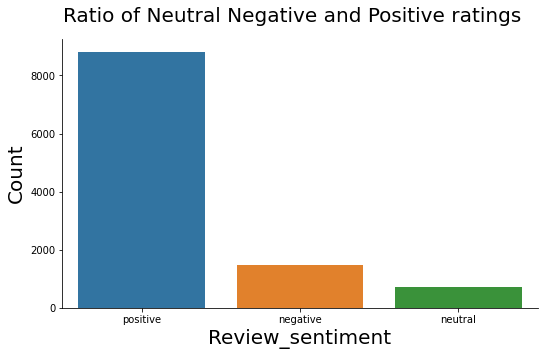

In [59]:
#Distribution of sentiment across the dataset
# Distribution of sentiment class
fig, axes = plt.subplots(1, figsize=(8,5))
fig.suptitle("Ratio of Neutral Negative and Positive ratings", fontsize = 20)
plt.tight_layout(pad = 3.5)
sns.countplot(x = "classes", data = df)
axes.set_xlabel("Review_sentiment", fontsize = 20)
axes.set_ylabel("Count", fontsize = 20)
sns.despine()

In [60]:
# Percentage of neutral, negative, positive words in train and test data
def pert_count(data, category):
    return (len(data[data["classes"] == category])/len(data)) * 100
print(f"Percentage of neutral words in train --> {pert_count(df, 'neutral')} %")
print(f"Percentage of negative words in train --> {pert_count(df, 'negative')} %")
print(f"Percentage of positive words in train --> {pert_count(df, 'positive')} %")

Percentage of neutral words in train --> 6.467706821480407 %
Percentage of negative words in train --> 13.50689404934688 %
Percentage of positive words in train --> 80.02539912917271 %


**Words and word clouds**

In [61]:
# Most repeated words in reviews
stopwords = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "white",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(str(data))
    fig = plt.figure(figsize = (8.5, 8.5))
    plt.axis("on")
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.35)
    plt.imshow(wordcloud)
    plt.show()

In [62]:
# seperating all records into a different variable to generate wordcloud based on category
neu=df[df["classes"] == "neutral"]["cleaned_reviews"]
neg=df[df["classes"] == "negative"]["cleaned_reviews"]
pos=df[df["classes"] == "positive"]["cleaned_reviews"]

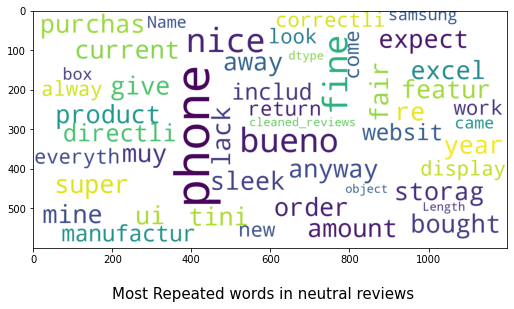

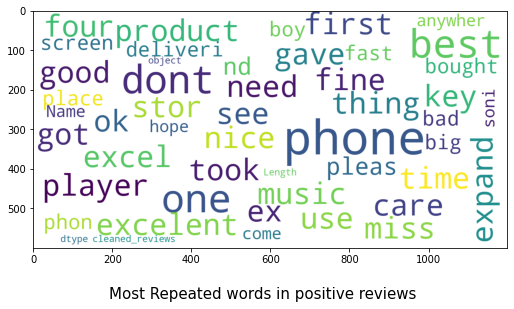

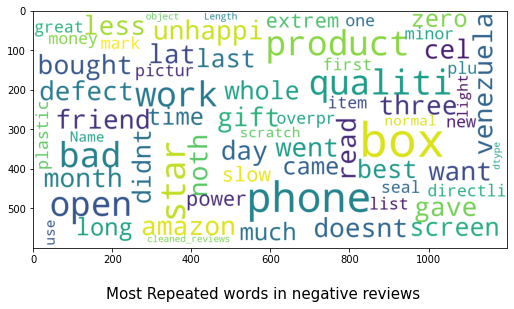

In [63]:
# Generating wordcloud based on category
word_cloud(neu, "Most Repeated words in neutral reviews")
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")

In [64]:
# Function for bigram
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]# apply function above

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


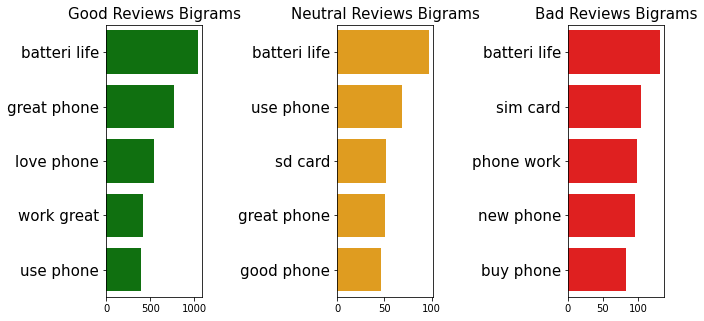

In [65]:
# create a function for bigram plots
def n_gram_plot(data,title,color):
    x=[x[0] for x in data]
    y=[x[1] for x in data]
    sns.barplot(y,x,color='{}'.format(color))
    plt.title('{} Reviews Bigrams'.format(title),fontsize=15)
    plt.yticks(rotation=0,fontsize=15)

common_words_good = get_top_n_bigram(pos, 5)
common_words_neutral= get_top_n_bigram(neu, 5)
common_words_bad= get_top_n_bigram(neg, 5)

# bigram plot using function above
plt.figure(figsize=(10,5))
# good reviews bigrams
plt.subplot(151)
n_gram_plot(common_words_good,'Good','green')
#============================================= 
#neutral reviews bigrams
plt.subplot(153)
n_gram_plot(common_words_neutral,'Neutral','orange')
#============================================= 
#bad reviews bigrams
plt.subplot(155)
n_gram_plot(common_words_bad,'Bad','red')
plt.show()

The above Bigrams shows the sentiment review analysis of all aspects of the brands

In [73]:
# calculating sentiment polarity using external libraries
df['sentiment'] = df['cleaned_reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df.head(3)

,overall,reviewerID,reviewText,summary,review_sentiment,Date&Time,Unnamed: 0.1,Unnamed: 0.1.1,category,also_buy,image,brand,feature,rank,also_view,details,similar_item,price,classes,y,cleaned_reviews,sentiment
0,4.0,A1ICOB5XZ9GK3R,i gave it a four because when i first got it i...,Blackberry Rim 8520,POSITIVE,2009-09-06,20417,20417,"['Cell Phones & Accessories', 'Cell Phones', '...","['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",[],{},"class=""a-bordered a-horizontal-stripes a-spa...",$16.00,positive,2,gave four first got took time see get use key ...,0.124242
1,5.0,A2O0XNK7T4KASU,good,Good,POSITIVE,2017-08-17,20417,20417,"['Cell Phones & Accessories', 'Cell Phones', '...","['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",[],{},"class=""a-bordered a-horizontal-stripes a-spa...",$16.00,positive,2,good,0.700000
2,5.0,A3CB1J66JA929L,ok,Five Stars,POSITIVE,2017-07-14,20417,20417,"['Cell Phones & Accessories', 'Cell Phones', '...","['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",[],{},"class=""a-bordered a-horizontal-stripes a-spa...",$16.00,positive,2,ok,0.500000


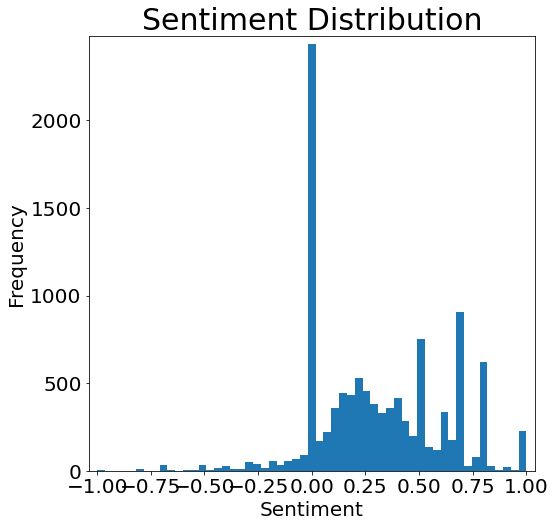

In [72]:
#Barchart using to visualize the sentiment distribution generated above
plt.figure(figsize=(8,8))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize=20)
plt.hist(df['sentiment'], bins=55)
plt.title('Sentiment Distribution', fontsize=30)
plt.show()


We can conclude that there's more reviews that look neutral exist in our dataset than there are positive or negative reviews. We also see that people tend to put in reviews only when its positive or when its neutral and they barely bother to put up a review when its a really bad product.

**Correlation heatmap to analyse the dependence between review length and sentiment**


It is a known fact that individuals tend to rant more about a product than they would praise a product. The following correlation heatmap further proves that face, there's a negative correlation between review length and the sendiment indicating negative reviews tend to be longer than positive or neutral ones.

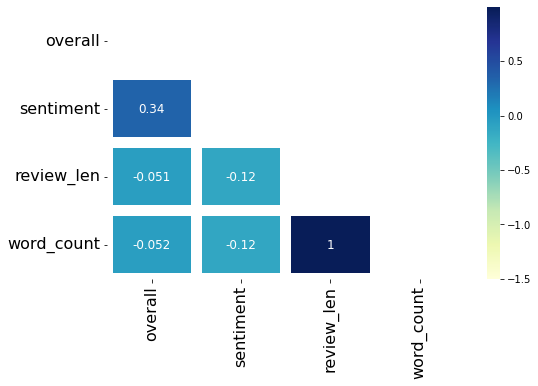

In [75]:
# Heatmap from overall rating, review length, sentiment and word count

# calculating word count and review length
df['word_count'] = df["reviewText"].apply(lambda x: len(str(x).split(" ")))
df['review_len'] =df["reviewText"].apply(lambda x: len(str(x)))

# visualising the heatmap
correlation = df[['overall','sentiment', 'review_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8,5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.heatmap(correlation, cmap='YlGnBu', annot=True, annot_kws={"size": 12}, linewidths=10, vmin=-1.5, mask=mask)

In [76]:
#Libraries for Tokenization
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
#Libraries to implement Naive Bayes 
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
#Libraries to implement and optimize Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#To create Pipelines and select best feautures before passing through the model
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
#Pre-processing and NLP libraries
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download("stopwords")
import nltk
import re
import string
#Visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
#Tokenization methods to break down text into tokens(words)
#Using TF-IDF with ngram range of (1,1)
tfidf_vectorizer = TfidfVectorizer(min_df= 3, sublinear_tf=True, norm='l2', ngram_range=(1,1))
#Using Bag of Words with ngram range of (1,1)
counter_vectorizer = CountVectorizer(ngram_range=(1,1))

In [78]:
#Seperating test-train with standard 80-20 split
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]
X_train_class = df_train["cleaned_reviews"]
Y_train_class = df_train["y"]
X_test_class = df_test["cleaned_reviews"]
Y_test_class = df_test["y"]

In [79]:
#Creating Model Pipelines for various models with the pattern [Tokenizer Method][SelectKBest features][Model+Paramaters]
text_clf_classifier1 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', RandomForestClassifier()),])
#text_clf_classifier1 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', RandomForestClassifier(criterion='entropy')),])
text_clf_classifier2 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', MultinomialNB(alpha=11)),])
text_clf_classifier4 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', BernoulliNB(alpha=11)),])

In [80]:
#Function to execute and run Model Pipelines and display Model Paramaters used along with Accuracy
def run_model(text_clf_classifier):
  print(text_clf_classifier)
  classifier_model = text_clf_classifier.fit(X_train_class,Y_train_class)
  print(np.mean(classifier_model.predict(X_test_class)== Y_test_class))


**Random Forest Classifier Parameters tuned**

*   No of estimators - No. of trees - 100,
*   Information Gain criteria - Entropy & Gini Index : Gini Index gives better accuracy. 
*  Cost complexity pruning paramter - 0.0(No pruning)

In [81]:
print("Random Forest Classifier - Count Vectorizer:")
run_model(text_clf_classifier1)

Random Forest Classifier - Count Vectorizer:
Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_s


**Naive Bayes methods**

* Learning Rate Variants : 0.0001,0.001,0.01,0.1,1,3,5,8,11,13,15
* Best Results were given by alpha=11 for Counter Vectorizer for Tokenization

In [82]:
#Running Multinomial Naive Bayes - Counter Vertorizer for variety of learning rates to best estimate hyperparameter value
x_alpha=[0.0001,0.001,0.01,0.1,1,3,5,8,11,13,15]
y_accuracy=[]
for x in x_alpha:
  clf = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', MultinomialNB(alpha=x)),])
  classifier_model = clf.fit(X_train_class,Y_train_class)
  y_accuracy.append(np.mean(classifier_model.predict(X_test_class)== Y_test_class))

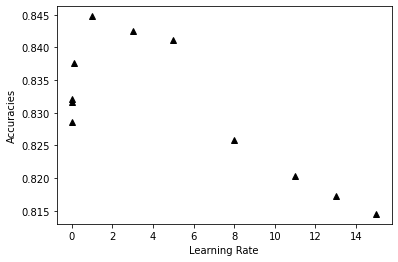

[0.8285198555956679, 0.8316787003610109, 0.8321299638989169, 0.8375451263537906, 0.8447653429602888, 0.8425090252707581, 0.8411552346570397, 0.825812274368231, 0.8203971119133574, 0.8172382671480144, 0.8145306859205776]


In [83]:
plt.plot(x_alpha,y_accuracy,'^k')
plt.ylabel('Accuracies')
plt.xlabel('Learning Rate')
plt.show()
print(y_accuracy)

In [84]:
print("Multinomial Naive Bayes - Count Vectorizer:")
run_model(text_clf_classifier2)

Multinomial Naive Bayes - Count Vectorizer:
Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('chi',
                 SelectKBest(k=2890,
                             score_func=<function chi2 at 0x7f0991962cb0>)),
                ('clf',
                 MultinomialNB(alpha=11, class_prior=None, fit_prior=True))],
         verbose=False)
0.8203971119133574


In [85]:
print("Bernoulli Naive Bayes - Count Vectorizer:")
run_model(text_clf_classifier4)

Bernoulli Naive Bayes - Count Vectorizer:
Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('chi',
                 SelectKBest(k=2890,
                             score_func=<function chi2 at 0x7f0991962cb0>)),
                ('clf',
                 BernoulliNB(alpha=11, binarize=0.0, class_prior=None,
                             fit_prior=True))],
         ver

In [86]:
def prediction(review):
  prediction_df = pd.DataFrame([[review,0]],columns = ["reviewText","y"])
  prediction_df = text_process(prediction_df)
  classifier_prediction = classifier_model.predict(prediction_df["cleaned_reviews"])
  return classifier_prediction[0]

In [88]:
prediction("works good, viewing angle critical for good picture,the size was perfect for the location")

2

In [90]:
df.to_csv('/content/drive/MyDrive/final_result_for_capstone.csv')